7) Determinação da tensão na carga e da potência transmitida (simulação): essa atividade consiste na especificação da tensão e da potência consumida na carga, atendendo às necessidades de sua aplicação. Use seu código para compreender quais parâmetros devem ser alterados para conseguir a tensão e a potência que precisa na carga (saber o valor equivalente da carga, em Ω, ajudará a compreender o que precisa ser alterado). Outro parâmetro crucial para seu projeto é o coeficiente de acoplamento (𝑘). Quanto mais distantes estão as bobinas, menor será 𝑘. Plotar um gráfico como o da figura seguinte vai ajudar a compreender como será possível confrontar a especificação de distância entre bobinas em seu projeto e a tensão/potência na carga. É importante também calcular a eficiência da transmissão. 

In [27]:
# Imports
from cmath import *
from math import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Resistências
R1 = 10
R2 = 10

# Indutâncias
L1 = 1*10**-3
L2 = 1*10**-3

# Capacitâncias
C1 = 1*10**-6
C2 = 1*10**-6

# Frequência
freq = 1/(sqrt(L1*C1))

# Frequência Angular
w = 2 * pi * freq

# Tensão de Pico
t_pico = 1 / w

# Indutância Mútua
k_list = np.arange(0,1.1,0.01)
#M = k * sqrt(L1 * L2)

# Impedâncias
XL1 = 1j * w * L1
XL2 = 1j * w * L2

XC1 = 1/(1j * w * C1)
XC2 = 1/(1j * w * C2)

#XM = 1j * w * M

In [57]:
def CalculaLeonardo(Uf, Rc, XM):
    Z=np.array([
        [R1+XL1+XC1             ,    -XM],
        [-XM, R2+XL2+(Rc/(Rc*1j*w*C2+1))]
                ])
    V=np.array([Uf,
                0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

In [85]:
C = 4.7*10**-6
f = 13700
Rc_list = np.arange(100,300,25)

Uf = (2/pi)*19
k = 0.1


V2_list = []
L_list = []
f_list = []
indices = []
v2_corr = []

Rdc = 0.5



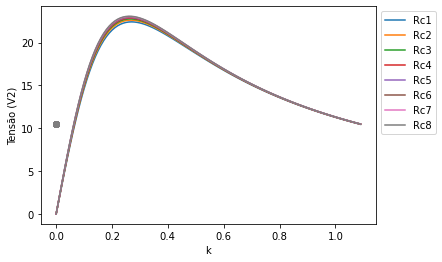

In [99]:
n=0
V_max  = []
k_max = []

for Rc in Rc_list:
    Vcarga_list = []
    c = 0
    n = n + 1
    for k in k_list:
        
        C1 = C2 = C

        R = R1 = R2 = Rdc + (2*Rdc/(100*10**3)) * f
        
        w = 2 * pi * f
        L = L1 = L2 = 1/((f**2)*4*(pi**2)*C)

        XC = XC1 = XC2 = 1/(1j * w * C)
        XL = XL1 = XL2 = 1j * w * L
        

        M = k * sqrt(L**2)
        XM = 1j * w * M


        i1, i2 = CalculaLeonardo(Uf, Rc, XM)


        V2 = ((Rc*XC)/(Rc+XC))*i2
        
        Vcarga_list.append(abs(V2))
    # V_max.append(abs(V2))
    # k_max.append(k_list[c])
    # c +=1
    
    plt.scatter(k_max,V_max)    
    plt.plot(k_list, Vcarga_list, label="Rc" + str(n))
    plt.xlabel("k")
    plt.ylabel("Tensão (V2)")
    plt.legend(bbox_to_anchor=(1,1))
    plt.grid()

plt.show()

In [ ]:
Rc_list

array([], dtype=int32)

In [100]:
n=0
V_max  = []
k_max = []

for Rc in Rc_list:
    Vcarga_list = []
    c = 0
    n = n + 1
    for k in k_list:
        
        C1 = C2 = C

        R = R1 = R2 = Rdc + (2*Rdc/(100*10**3)) * f
        
        w = 2 * pi * f
        L = L1 = L2 = 1/((f**2)*4*(pi**2)*C)

        XC = XC1 = XC2 = 1/(1j * w * C)
        XL = XL1 = XL2 = 1j * w * L
        

        M = k * sqrt(L**2)
        XM = 1j * w * M


        i1, i2 = CalculaLeonardo(Uf, Rc, XM)


        V2 = ((Rc*XC)/(Rc+XC))*i2
        
        Vcarga_list.append(abs(V2))

 # Armazenando o máximo para esta RC
        if n == 0 or abs(V2) > V_max[-1]:
            V_max.append(abs(V2))
            k_max.append(k)
        n += 1
    
    plt.plot(k_list, Vcarga_list, label="Rc" + str(n))
    
plt.scatter(k_max, V_max, color='red', label="V_max")
plt.xlabel("k")
plt.ylabel("Tensão (V2)")
plt.legend(bbox_to_anchor=(1,1))
plt.grid()
plt.show()

IndexError: list index out of range

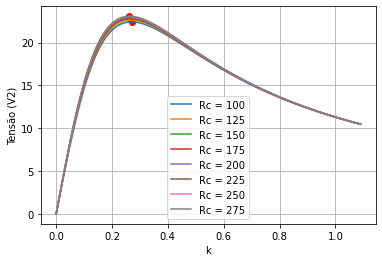

In [110]:
ks_max = []
vs_max= []
for Rc in Rc_list:
    Vcarga_list = []
    V_max = 0  # Valor máximo para esta RC
    k_max = 0   # Valor de k correspondente ao máximo
    for k in k_list:
        C1 = C2 = C
        R = R1 = R2 = Rdc + (2*Rdc/(100*10**3)) * f
        w = 2 * pi * f
        L = L1 = L2 = 1/((f**2)*4*(pi**2)*C)
        XC = XC1 = XC2 = 1/(1j * w * C)
        XL = XL1 = XL2 = 1j * w * L
        M = k * sqrt(L**2)
        XM = 1j * w * M
        i1, i2 = CalculaLeonardo(Uf, Rc, XM)
        V2 = ((Rc*XC)/(Rc+XC))*i2
        Vcarga_list.append(abs(V2))
        
        # Atualizando o valor máximo e o valor de k correspondente
        if abs(V2) > V_max:
            V_max = abs(V2)
            k_max = k
            vs_max.append(abs(V2))
            ks_max.append(k)
    
    # Plotando o gráfico para esta RC
    plt.plot(k_list, Vcarga_list, label="Rc = " + str(Rc))
    
    # Plotando o ponto correspondente ao máximo
    plt.scatter(k_max, V_max, color='red')
    
plt.xlabel("k")
plt.ylabel("Tensão (V2)")
plt.legend()
plt.grid()
plt.show()

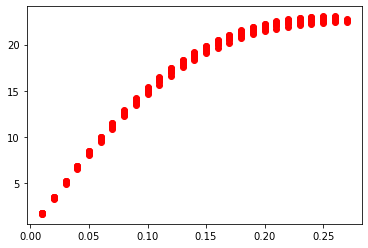

In [111]:
plt.scatter(ks_max, vs_max, color='red')


In [108]:
k_max

0.26